In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#### Importando os classificadores

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Árvore de decisão
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # SVM
from sklearn.neural_network import MLPClassifier # MLP

#### Importando a base de dados


In [ ]:
df = pd.read_csv('/content/ionosphere.csv')
df_param = pd.DataFrame(df, columns=df.columns[:-1])

In [ ]:
#Vizualização previa da base de dados
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
print(df_param.shape) # Mostra a quantidade de dados na base de dados

(351, 34)


#### Definimos o conjunto de teste


In [ ]:
#Realiza a divisão (metade para cada, 50% para treino e 50% para restante)
x_treino, x_restante, y_treino, y_restante = train_test_split(df_param, df['Class'], test_size=0.5, shuffle=True, stratify=df['Class'])

#Realiza a divisão do restante (metade para cada, 50% para teste e 50% para validação)
x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_restante, y_restante, test_size=0.5, shuffle=True, stratify=y_restante)
print('Treino')
print(x_treino.shape) # 50% (351/2 = 175,5)
print(np.unique(y_treino, return_counts=True))
print(' ')
print('Teste')
print(x_teste.shape) # 25% (351/4 = 88)
print(np.unique(y_teste, return_counts=True))
print(' ')
print('Validação')
print(x_validacao.shape) # 25% (351/4 = 88)
print(np.unique(y_validacao, return_counts=True))


Treino
(175, 34)
(array(['b', 'g'], dtype=object), array([ 63, 112]))
 
Teste
(88, 34)
(array(['b', 'g'], dtype=object), array([32, 56]))
 
Validação
(88, 34)
(array(['b', 'g'], dtype=object), array([31, 57]))


# Obtendo os melhores parametros

## KNN

In [ ]:
#KNN Não ponderado
print('KNN Não ponderado')
# Inicializa um array vazio onde sera gravado a acuracia
acuracia = []

for i in range (1,21):
  knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
  knn.fit(x_treino, y_treino)
  prev = knn.predict(x_validacao)
  
  # Grava a acuracia com o k = i na posicao i+1
  acuracia.append(accuracy_score(y_validacao, prev))

melhor_k = np.argmax(acuracia)+1  # Grava o valor que apresentou o melhor resuldado
print("Melhor K = ", melhor_k) # Mostra o valor que apresentou a maior acuracia
print("Acuracia com o K=", melhor_k, " = ", acuracia[np.argmax(acuracia)])
print(acuracia)
print("")
  
#KNN Ponderado pelo inverso da distância euclidiana
print('KNN Ponderado pelo inverso da distância euclidiana')
# Inicializa um array vazio onde sera gravado a acuracia
acuracia = []

for i in range (1,21):
  knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance')
  knn.fit(x_treino, y_treino)
  prev = knn.predict(x_validacao)
  
  # Grava a acuracia com o k = i na posicao i+1
  acuracia.append(accuracy_score(y_validacao, prev))

melhor_k = np.argmax(acuracia)+1  # Grava o valor que apresentou o melhor resuldado
print("Melhor K = ", melhor_k) # Mostra o valor que apresentou a maior acuracia
print("Acuracia com o K=", melhor_k, " = ", acuracia[np.argmax(acuracia)])
print(acuracia)
print("")

KNN Não ponderado
Melhor K =  2
Acuracia com o K= 2  =  0.875
[0.8181818181818182, 0.875, 0.8295454545454546, 0.8409090909090909, 0.8181818181818182, 0.8409090909090909, 0.8068181818181818, 0.8295454545454546, 0.7954545454545454, 0.8068181818181818, 0.7613636363636364, 0.7727272727272727, 0.7613636363636364, 0.7840909090909091, 0.7840909090909091, 0.7954545454545454, 0.7954545454545454, 0.8068181818181818, 0.7727272727272727, 0.7840909090909091]

KNN Ponderado pelo inverso da distância euclidiana
Melhor K =  3
Acuracia com o K= 3  =  0.8295454545454546
[0.8181818181818182, 0.8181818181818182, 0.8295454545454546, 0.8295454545454546, 0.8181818181818182, 0.8295454545454546, 0.8068181818181818, 0.8068181818181818, 0.7954545454545454, 0.7840909090909091, 0.7613636363636364, 0.7613636363636364, 0.7613636363636364, 0.7840909090909091, 0.7840909090909091, 0.7840909090909091, 0.7954545454545454, 0.7954545454545454, 0.7727272727272727, 0.7840909090909091]



## Árvore de decisão

### Encontrando os melhores parametros

In [ ]:
# Árvore sem poda
ad = DecisionTreeClassifier()
ad.fit(x_treino, y_treino) 
prev = ad.predict(x_validacao)

print("Nós = ", ad.tree_.node_count)

depth = ad.get_depth() # Pega a densidade da árvore sem poda
depth = depth + 1 # Adiciona um para rodar um a mais da densidade maxima

# Inicializa um array vazio onde sera gravado a acuracia
acuracia = []

# Comparando todas as árvores possiveis
for i in range (1, depth):
  ad = DecisionTreeClassifier(max_depth = i)
  ad.fit(x_treino, y_treino) 
  prev = ad.predict(x_validacao)
  # Grava a taxa de erro com o max_depth = i na posicao i+1
  acuracia.append(accuracy_score(y_validacao, prev))
  print("Nós = ", ad.tree_.node_count)

melhor_max_depth = np.argmax(acuracia)+1  # Grava o valor que apresentou o melhor resuldado
print(acuracia)
print("Melhor densidade = ", melhor_max_depth) # Mostra o valor que apresentou a maior acuracia
print("Acuracia com a densidade =", melhor_max_depth, " = ", acuracia[np.argmax(acuracia)])

Nós =  29
Nós =  3
Nós =  7
Nós =  13
Nós =  19
Nós =  23
Nós =  25
Nós =  27
Nós =  29
[0.7954545454545454, 0.9545454545454546, 0.8863636363636364, 0.9659090909090909, 0.9772727272727273, 0.9545454545454546, 0.9431818181818182, 0.9431818181818182]
Melhor densidade =  5
Acuracia com a densidade = 5  =  0.9772727272727273


A melhor densidade foi 3, a árvore ficou com 7 nós

### Rodando o classificador com os melhores parametros obtidos

In [ ]:
# Inicializa o classificador com o melhor parametro
ad = DecisionTreeClassifier(max_depth = 3)
ad.fit(x_treino, y_treino) 
prev = ad.predict(x_teste)

# Avalia a precisão
print(accuracy_score(y_teste, prev))
print(confusion_matrix(y_teste, prev))

0.8522727272727273
[[21 10]
 [ 3 54]]


### Visualização gráfica da arvore

In [ ]:
# Necessario fazer a instalação para exibir a árvore graficamente
!apt-get install python-pydot
!pip install pydotplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pydot is already the newest version (1.2.3-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


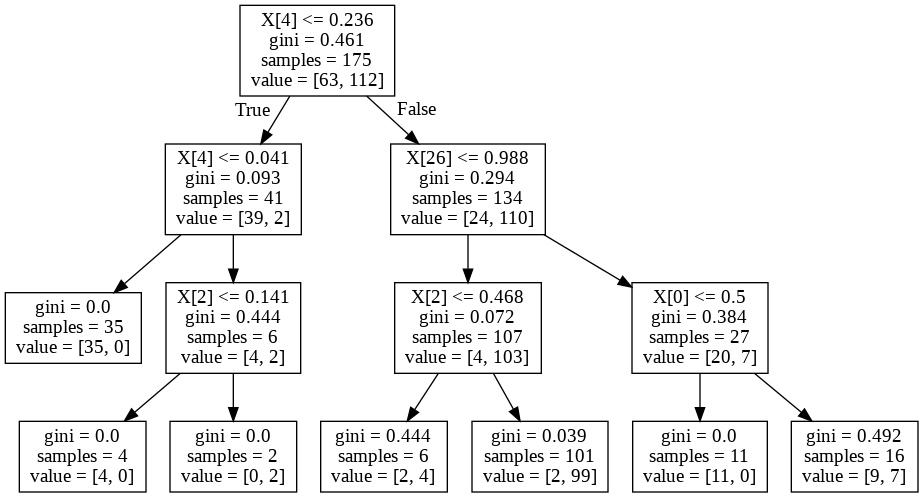

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(ad, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Naive Bayes

In [ ]:
# Inicializa o classificador
nb = GaussianNB()

# Treina o classificador
nb.fit(x_treino, y_treino)
prev = nb.predict(x_teste)

# Avalia a precisão
print(accuracy_score(y_teste, prev))
print(confusion_matrix(y_teste, prev))


0.9318181818181818
[[26  5]
 [ 1 56]]


## SVM

### Encontrando os melhores parametros

In [ ]:
#SVM Polinomial
print('SVM Polinomial')
# Inicializa um array vazio onde será gravado a acuracia
acuracia = []

# Testa vários degree no classificador
for i in range(1,21):
  svm_polinomial = SVC(C=i, kernel='poly')
  svm_polinomial.fit(x_treino, y_treino)
  prev = svm_polinomial.predict(x_validacao)
  # Grava a taxa de erro com o c = i na posicao i+1
  acuracia.append(accuracy_score(y_validacao, prev))

melhor_c = (np.argmax(acuracia)+1) # Grava o valor que apresentou o melhor resuldado
print(acuracia) # Mostra as acuracias
print("Melhor C = ", melhor_c) # Mostra o valor que apresentou a maior acuracia
print("Acuracia com o C =", melhor_c, " = ", acuracia[np.argmax(acuracia)])
print('------------------------------------------------------------------')
# SVM Radial
print('SVM Radial')
acuracia = []

for i in range(1,20):
  svm_radial = SVC(C=i, kernel='rbf')
  svm_radial.fit(x_treino, y_treino)
  prev = svm_radial.predict(x_validacao)
  # Grava a taxa de erro com o degree = i na posicao i+1
  acuracia.append(accuracy_score(y_validacao, prev))

melhor_c = (np.argmax(acuracia)+1) # Grava o valor que apresentou o melhor resuldado
print(acuracia) # Mostra as taxas de erro
print("Melhor C = ", melhor_c) # Mostra o valor que apresentou a maior acuracia
print("Acuracia com o C =", melhor_c, " = ", acuracia[np.argmax(acuracia)])

SVM Polinomial
[0.9090909090909091, 0.9204545454545454, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9204545454545454, 0.9090909090909091, 0.9090909090909091, 0.9204545454545454, 0.9204545454545454, 0.9204545454545454, 0.9204545454545454, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818]
Melhor C =  3
Acuracia com o C = 3  =  0.9431818181818182
------------------------------------------------------------------
SVM Radial
[0.9886363636363636, 0.9886363636363636, 0.9659090909090909, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9772727272727273, 0.9659090909090909]
Melhor C =  1
Acuracia com o C = 1  =  0.9886363636363636


O melhor SVM foi o radial com o C = 2



## MLP

In [ ]:
acuracia = []

# Inicializa o classificador
for i in range (1,10):
  for j in range (1,10):
    for k in range (1,10):
      mlp = MLPClassifier(max_iter=(k*200) , hidden_layer_sizes=(j*50), learning_rate_init=((i)/10) )
      mlp.fit(x_treino, y_treino)
      prev = mlp.predict(x_validacao)
      
      # Grava a acuracia com o k = i na posição i+1
      acuracia.append(accuracy_score(y_validacao, prev))

melhor_param = str(np.argmax(acuracia)+111)
print(acuracia)

melhor_max_iter = int(melhor_param[0])*200 # Grava os parametros que apresentaram o melhor resultado
melhor_hidden_layer = int(melhor_param[1])*50
melhor_learning_rate = int(melhor_param[2])/10
print("Melhor max iter = ", melhor_max_iter) # Mostra o valor que apresentou a maior acuracia
print("Melhor hidden layer = ",melhor_hidden_layer)
print("Melhor learning rate = ",melhor_learning_rate)
print("Acuracia com os melhores parametros = ", acuracia[np.argmax(acuracia)])

[0.9431818181818182, 0.9431818181818182, 0.9545454545454546, 0.9545454545454546, 0.9318181818181818, 0.9659090909090909, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9318181818181818, 0.9659090909090909, 0.9545454545454546, 0.9431818181818182, 0.9431818181818182, 0.9318181818181818, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9318181818181818, 0.9431818181818182, 0.9431818181818182, 0.9318181818181818, 0.9659090909090909, 0.9545454545454546, 0.9431818181818182, 0.9659090909090909, 0.9318181818181818, 0.9431818181818182, 0.9318181818181818, 0.9431818181818182, 0.9431818181818182, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9318181818181818, 0.9545454545454546, 0.9318181818181818, 0.9659090909090909, 0.9318181818181818, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9545454545454546, 0.9431818181818182, 0.9431818181818182, 0.9431818181818182, 0.9545454545454546, 0.9545454545454546, 0.9431818181818182,

O melhor MLP foi com os seguintes parametros:

*   Melhor épocas de treino =  200
*   Melhor camadas escondidas =  250
*   Melhor taxa de aprendizagem =  0.4



# Avaliando os classificadores

In [ ]:
acuraciaknn = []
acuraciaad = []
acuracianb = []
acuraciasvm = []
acuraciamlp = []

soma = []
produto = []

for i in range(1,21):

  #Realiza a divisão (metade para cada, 50% para treino e 50% para restante)
  x_treino, x_restante, y_treino, y_restante = train_test_split(df_param, df['Class'], test_size=0.5, shuffle=True, stratify=df['Class'])

  #Realiza a divisão do restante (metade para cada, 50% para teste e 50% para validação)
  x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_restante, y_restante, test_size=0.5, shuffle=True, stratify=y_restante)
    
  # KNN
  # Inicializa o classificador com o melhor parametro
  knn = KNeighborsClassifier(n_neighbors = 2)
  knn.fit(x_treino, y_treino)
  prev = knn.predict(x_teste)
  
  acuraciaknn.append(accuracy_score(y_teste, prev))

  # Avalia a precisão
  clasiffication_knn = classification_report(y_teste, prev)
  knn_prev = prev  

  # Árvore de decisão
  # Inicializa o classificador com o melhor parametro
  ad = DecisionTreeClassifier(max_depth = 3)
  ad.fit(x_treino, y_treino) 
  prev = ad.predict(x_teste)

  acuraciaad.append(accuracy_score(y_teste, prev))

  # Avalia a precisão
  clasiffication_ad = classification_report(y_teste, prev)
  ad_prev = prev

  # NB
  # Inicializa o classificador
  nb = GaussianNB()
  nb.fit(x_treino, y_treino)
  prev = nb.predict(x_teste)

  acuracianb.append(accuracy_score(y_teste, prev))

  # Avalia a precisão
  clasiffication_nb = classification_report(y_teste, prev)
  nb_prev = prev

  # SVM
  svm_radial = SVC(C=2, kernel='rbf', probability=True)
  svm_radial.fit(x_treino, y_treino)
  prev = svm_radial.predict(x_teste)

  acuraciasvm.append(accuracy_score(y_teste, prev))
  
  # Avalia a precisão
  clasiffication_svm = classification_report(y_teste, prev)
  svm_prev = prev
 
  # MLP
  mlp = MLPClassifier(max_iter=200 , hidden_layer_sizes=50, learning_rate_init=0.4)
  mlp.fit(x_treino, y_treino)
  prev = mlp.predict(x_teste)

  acuraciamlp.append(accuracy_score(y_teste, prev))

  # Avalia a precisão
  clasiffication_mlp = classification_report(y_teste, prev)
  mlp_prev = prev

  svm_proba = svm_radial.predict_proba(x_teste)
  knn_proba = knn.predict_proba(x_teste)
  ad_proba = ad.predict_proba(x_teste)
  mlp_proba = mlp.predict_proba(x_teste)
  nb_proba = nb.predict_proba(x_teste)


print("KNN")
print("")
print("Acuracias = ", acuraciaknn)
print("Maior acuracia = ", acuraciaknn[np.argmax(acuraciaknn)])
print("Desvio padrão = ", statistics.pstdev(acuraciaknn))
print("Media geometrica = ", statistics.mean(acuraciaknn))
print(clasiffication_knn)
print("")
print("-----------------------------------------------------------------------")
print("")
print("Árvore de decisão")
print("")
print(acuraciaad)
print("Maior acuracia = ", acuraciaad[np.argmax(acuraciaad)])
print("Desvio padrão = ", statistics.pstdev(acuraciaad))
print("Media geometrica = ", statistics.mean(acuraciaad))
print(clasiffication_ad)
print("")
print("-----------------------------------------------------------------------")
print("")
print("Naive Bayes")
print("")
print(acuracianb)
print("Maior acuracia = ", acuracianb[np.argmax(acuracianb)])
print("Desvio padrão = ", statistics.pstdev(acuracianb))
print("Media geometrica = ", statistics.mean(acuracianb))
print(clasiffication_nb)
print("")
print("-----------------------------------------------------------------------")
print("")
print("SVM")
print("")
print(acuraciasvm)
print("Maior acuracia = ", acuraciasvm[np.argmax(acuraciasvm)])
print("Desvio padrão = ", statistics.pstdev(acuraciasvm))
print("Media geometrica = ", statistics.mean(acuraciasvm))
print(clasiffication_svm)
print("")
print("-----------------------------------------------------------------------")
print("")
print("MLP")
print("")
print(acuraciamlp)
print("Maior acuracia = ", acuraciamlp[np.argmax(acuraciamlp)])
print("Desvio padrão = ", statistics.pstdev(acuraciamlp))
print("Media geometrica = ", statistics.mean(acuraciamlp))
print(clasiffication_mlp)